In [0]:
from os import listdir
import os
import numpy as np
import cv2
from tqdm import tqdm
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from tqdm import tqdm
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from tensorflow.keras.layers import Dense, Input, Layer
from keras.preprocessing.image import ImageDataGenerator


Setup generator

In [0]:

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
generator = datagen.flow_from_directory(
        WORKING_DIRECTORY,
        target_size=(224, 224),
        batch_size=42,
        class_mode=None,
        shuffle=False)


In [0]:
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)
yhat = vgg_model.predict_generator(generator, verbose=1)

In [0]:
import umap 
yhat_tmp = yhat[:,0,0,:]
embedding = umap.UMAP(n_neighbors=15).fit_transform(yhat_tmp)

import pickle
with open('/content/drive/My Drive/BAP/embedding.pickle', 'wb') as f:
    pickle.dump(embedding, f)

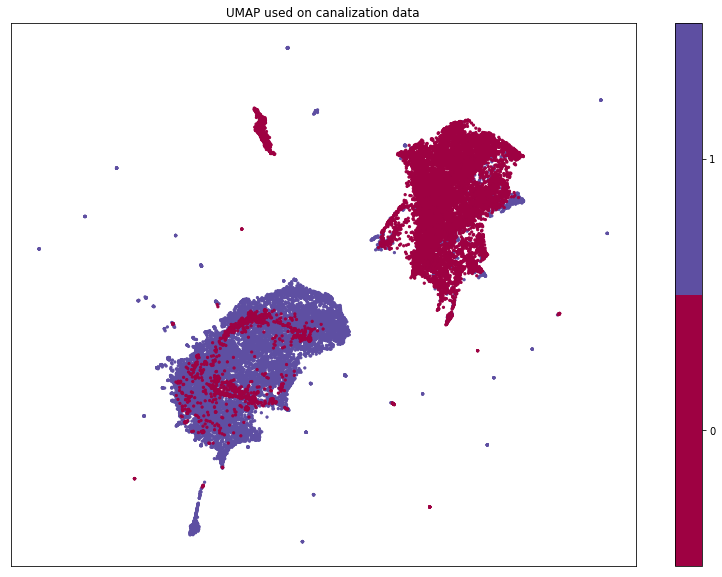

In [0]:
import matplotlib.pyplot as plt
DEFECT_IMAGES_PATH =  # YOUR PATH
HEALTHY_IMAGES_PATH =  # YOUR PATH
fig, ax = plt.subplots(1, figsize=(14, 10))
plt.scatter(*embedding.T, s=5, cmap='Spectral', alpha=1.0, c=np.concatenate((np.ones(len(list(os.listdir(HEALTHY_IMAGES_PATH)))), np.zeros(len(list(os.listdir(DEFECT_IMAGES_PATH)))))))
plt.setp(ax, xticks=[], yticks=[])
cbar = plt.colorbar(boundaries=np.arange(3)-0.5)
cbar.set_ticks(np.arange(10))
plt.title('UMAP used on canalization data');